### Επίδραση του Αριθμού των Δωρεάν Αδειών στα Κέρδη και άλλες Μεταβλητές των Επιχειρήσεων

**Πείραμα:**
- Emission cap = 80% BAU emissions
- 6 εταιρείες
- 2 τομείς
  - Ο 1ος τομέας έχει μικρότερο μέγεθος σε όρους πωλήσεων

**Διαδικασία:**
Δίνουμε σταδιακά περισσότερες δωρεάν άδειες στις 3 εταιρείες του 1ου τομέα και παρατηρούμε τις επιπτώσεις στα κέρδη και άλλες μεταβλητές. Στον 2ο τομέα, δεν δίνονται δωρεάν άδειες.

- Δωρεάν άδειες στον 1ο τομέα: από 0 έως την ποσότητα παραγωγής (q).


In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from funkwpap import *
import sympy as sp, pandas as pd, numpy as np, tqdm, time, sys, matplotlib.pyplot as plt, tqdm
from statistics import mean
from scipy.optimize import fsolve
from random import random


In [2]:
x = sp.symbols('x')
cap = 200 # total emission cap
Regulator19 = Regulator("Regulator19", permit_price = 2.4079, emission_cap = cap)
sector1 = Sector('cement', price_demand_function= 100 - 0.1*x, free_emission_multiplier= 0, regulator= Regulator19)
sector2 = Sector('steel', price_demand_function=150 - 0.1*x, free_emission_multiplier= 0, regulator= Regulator19)

country3 = Country('GR', size= 0.1, regulator= Regulator19)

# Create Firms using objects
firm1 = Firm('firm1', 1, 1, x*0, 10*x+ 2*x**2 + 0.1*x**3 , 0, 0, 0, regulator= Regulator19)
firm2 = Firm('firm2', 1, 2, x*0, 11*x+ 3*x**2 + 0.2*x**3, 0, 0, 0, regulator= Regulator19)
firm3 = Firm('firm3', 1, 3, x*0, 5*x+ 4*x**2 + 5*x**3 , 0, 0, 0, regulator= Regulator19)
firm4 = Firm('firm4', 2, 1, x*0, 7*x+ 5*x**2 + 3*x**3 , 0, 0, 0, regulator= Regulator19)
firm5 = Firm('firm5', 2, 2, x*0, 1*x+ 6*x**2 + 2*x**3 , 0, 0, 0, regulator= Regulator19)
firm6 = Firm('firm6', 2, 3, x*0, 2*x+ 7*x**2 + 3*x**3 , 0, 0, 0, regulator= Regulator19)

In [3]:
Regulator19.BAU_calculator()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-14


In [4]:
Regulator19.emission_cap = Regulator19.BAU_emissions * 0.8

frees = np.linspace(0, 1, 100)

profits1 = []
profits2 = []
abatements1 = []
abatements2 = []
trades1 = []
trades2 = []
revenews1 = []
revenews2 = []
permit_price = []
outputs1 = []
outputs2 = []
emissions1 = []
emissions2 = []
permits_bought_1 = []
permits_bought_2 = []
permits_free_1 = []
permits_free_2 = []
permits_used_1 = []
permits_used_2 = []


for free in tqdm.tqdm(frees):
    
    
    sector1.free_emission_multiplier = free
    Regulator19.optimization_with_least_squares_ab()
    print(f"{free}: {Regulator19.equilibrium_tester(output = True)}")

    for firm in Regulator19.firm_registry.values():
        firm.calculate_profit_components()

    profits1.append(mean( float(i.profit) for i in sector1.firms))
    profits2.append(mean( float(i.profit) for i in sector2.firms))
    abatements1.append(mean( float(i.abatement) for i in sector1.firms))
    abatements2.append(mean( float(i.abatement) for i in sector2.firms))
    permits_used_1.append(mean( float(i.permits_used) for i in sector1.firms))
    permits_used_2.append(mean( float(i.permits_used) for i in sector2.firms))
    permits_free_1.append(mean( float(i.free_permits) for i in sector1.firms))
    permits_free_2.append(mean( float(i.free_permits) for i in sector2.firms))
    permits_bought_1.append(mean( float(i.permits_bought) for i in sector1.firms))
    permits_bought_2.append(mean( float(i.permits_bought) for i in sector2.firms))
    trades1.append(mean( float(i.permits_costs) for i in sector1.firms))
    trades2.append(mean( float(i.permits_costs) for i in sector2.firms))
    revenews1.append( mean(float(i.sales) for i in sector1.firms))
    revenews2.append(mean( float(i.sales) for i in sector2.firms))
    permit_price.append(Regulator19.permit_price)
    outputs1.append(mean( float(i.actual_output) for i in sector1.firms))
    outputs2.append(mean( float(i.actual_output) for i in sector2.firms))
    emissions1.append(mean( float(i.emission) for i in sector1.firms))
    emissions2.append(mean( float(i.emission) for i in sector2.firms))    

  0%|          | 0/100 [00:00<?, ?it/s]

Optimal solution found


  1%|          | 1/100 [00:02<04:53,  2.97s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.62e-5 ✔️ |  +2.62e-5 ✔️ |   -5.7698 ✔️ |   -5.9698 ✔️ |   +1.1540 ✔️ | 5/5
0.0: (True, 2.62219216704551e-5)


  2%|▏         | 2/100 [00:05<04:15,  2.61s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.58e-5 ✔️ |  +2.58e-5 ✔️ |   -5.7823 ✔️ |   -5.9823 ✔️ |   +1.1565 ✔️ | 5/5
0.010101010101010102: (True, 2.57859206769240e-5)


  3%|▎         | 3/100 [00:07<04:01,  2.49s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.07e-5 ✔️ |  +8.07e-5 ✔️ |   -5.7949 ✔️ |   -5.9949 ✔️ |   +1.1590 ✔️ | 5/5
0.020202020202020204: (True, 8.06928900676240e-5)


  4%|▍         | 4/100 [00:10<03:58,  2.48s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.60e-5 ✔️ |  +2.60e-5 ✔️ |   -5.8076 ✔️ |   -6.0076 ✔️ |   +1.1615 ✔️ | 5/5
0.030303030303030304: (True, 2.60317801714649e-5)


  5%|▌         | 5/100 [00:12<03:50,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.60e-5 ✔️ |  +2.60e-5 ✔️ |   -5.8204 ✔️ |   -6.0204 ✔️ |   +1.1641 ✔️ | 5/5
0.04040404040404041: (True, 2.60249637555887e-5)


  6%|▌         | 6/100 [00:14<03:43,  2.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.60e-5 ✔️ |  +2.60e-5 ✔️ |   -5.8333 ✔️ |   -6.0333 ✔️ |   +1.1667 ✔️ | 5/5
0.05050505050505051: (True, 2.59715705226427e-5)


  7%|▋         | 7/100 [00:17<03:45,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.67e-5 ✔️ |  +2.67e-5 ✔️ |   -5.8463 ✔️ |   -6.0463 ✔️ |   +1.1693 ✔️ | 5/5
0.06060606060606061: (True, 2.67239783511286e-5)


  8%|▊         | 8/100 [00:19<03:42,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.66e-5 ✔️ |  +2.66e-5 ✔️ |   -5.8594 ✔️ |   -6.0594 ✔️ |   +1.1719 ✔️ | 5/5
0.07070707070707072: (True, 2.65963317804818e-5)


  9%|▉         | 9/100 [00:22<03:39,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.07e-5 ✔️ |  +8.07e-5 ✔️ |   -5.8727 ✔️ |   -6.0727 ✔️ |   +1.1745 ✔️ | 5/5
0.08080808080808081: (True, 8.06558223729326e-5)


 10%|█         | 10/100 [00:24<03:37,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -5.8860 ✔️ |   -6.0860 ✔️ |   +1.1772 ✔️ | 5/5
0.09090909090909091: (True, 8.06450389720936e-5)


 11%|█         | 11/100 [00:26<03:32,  2.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.08e-5 ✔️ |  +8.08e-5 ✔️ |   -5.8994 ✔️ |   -6.0994 ✔️ |   +1.1799 ✔️ | 5/5
0.10101010101010102: (True, 8.08184977127979e-5)


 12%|█▏        | 12/100 [00:29<03:27,  2.36s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.08e-5 ✔️ |  +8.08e-5 ✔️ |   -5.9130 ✔️ |   -6.1130 ✔️ |   +1.1826 ✔️ | 5/5
0.11111111111111112: (True, 8.07962539184359e-5)


 13%|█▎        | 13/100 [00:31<03:29,  2.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -5.9266 ✔️ |   -6.1266 ✔️ |   +1.1853 ✔️ | 5/5
0.12121212121212122: (True, 8.06402454962551e-5)


 14%|█▍        | 14/100 [00:33<03:23,  2.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.08e-5 ✔️ |  +8.08e-5 ✔️ |   -5.9404 ✔️ |   -6.1404 ✔️ |   +1.1881 ✔️ | 5/5
0.13131313131313133: (True, 8.07792970221044e-5)


 15%|█▌        | 15/100 [00:36<03:19,  2.35s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.08e-5 ✔️ |  +8.08e-5 ✔️ |   -5.9543 ✔️ |   -6.1543 ✔️ |   +1.1909 ✔️ | 5/5
0.14141414141414144: (True, 8.07629119066178e-5)


 16%|█▌        | 16/100 [00:38<03:17,  2.35s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.07e-5 ✔️ |  +8.07e-5 ✔️ |   -5.9683 ✔️ |   -6.1683 ✔️ |   +1.1937 ✔️ | 5/5
0.15151515151515152: (True, 8.07496533461460e-5)


 17%|█▋        | 17/100 [00:40<03:13,  2.33s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.07e-5 ✔️ |  +8.07e-5 ✔️ |   -5.9824 ✔️ |   -6.1824 ✔️ |   +1.1965 ✔️ | 5/5
0.16161616161616163: (True, 8.07327513729916e-5)


 18%|█▊        | 18/100 [00:43<03:09,  2.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.07e-5 ✔️ |  +8.07e-5 ✔️ |   -5.9966 ✔️ |   -6.1966 ✔️ |   +1.1993 ✔️ | 5/5
0.17171717171717174: (True, 8.07205274035994e-5)


 19%|█▉        | 19/100 [00:45<03:11,  2.36s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.07e-5 ✔️ |  +8.07e-5 ✔️ |   -6.0110 ✔️ |   -6.2110 ✔️ |   +1.2022 ✔️ | 5/5
0.18181818181818182: (True, 8.07400622857557e-5)


 20%|██        | 20/100 [00:48<03:09,  2.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.07e-5 ✔️ |  +8.07e-5 ✔️ |   -6.0255 ✔️ |   -6.2255 ✔️ |   +1.2051 ✔️ | 5/5
0.19191919191919193: (True, 8.07252761365618e-5)


 21%|██        | 21/100 [00:50<03:06,  2.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.07e-5 ✔️ |  +8.07e-5 ✔️ |   -6.0401 ✔️ |   -6.2401 ✔️ |   +1.2080 ✔️ | 5/5
0.20202020202020204: (True, 8.07167903023043e-5)


 22%|██▏       | 22/100 [00:52<03:04,  2.36s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.07e-5 ✔️ |  +8.07e-5 ✔️ |   -6.0548 ✔️ |   -6.2548 ✔️ |   +1.2110 ✔️ | 5/5
0.21212121212121213: (True, 8.06624351188390e-5)


 23%|██▎       | 23/100 [00:55<03:02,  2.36s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.07e-5 ✔️ |  +8.07e-5 ✔️ |   -6.0696 ✔️ |   -6.2696 ✔️ |   +1.2139 ✔️ | 5/5
0.22222222222222224: (True, 8.06565300095485e-5)


 24%|██▍       | 24/100 [00:57<02:58,  2.35s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.0846 ✔️ |   -6.2846 ✔️ |   +1.2169 ✔️ | 5/5
0.23232323232323235: (True, 8.06498307071024e-5)


 25%|██▌       | 25/100 [00:59<02:54,  2.33s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.0997 ✔️ |   -6.2997 ✔️ |   +1.2199 ✔️ | 5/5
0.24242424242424243: (True, 8.06477705044273e-5)


 26%|██▌       | 26/100 [01:02<02:53,  2.34s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.1150 ✔️ |   -6.3150 ✔️ |   +1.2230 ✔️ | 5/5
0.25252525252525254: (True, 8.06426891468703e-5)


 27%|██▋       | 27/100 [01:04<02:49,  2.32s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.1303 ✔️ |   -6.3303 ✔️ |   +1.2261 ✔️ | 5/5
0.26262626262626265: (True, 8.05714748750574e-5)


 28%|██▊       | 28/100 [01:06<02:46,  2.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.1459 ✔️ |   -6.3459 ✔️ |   +1.2292 ✔️ | 5/5
0.27272727272727276: (True, 8.05681587827678e-5)


 29%|██▉       | 29/100 [01:08<02:43,  2.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.1615 ✔️ |   -6.3615 ✔️ |   +1.2323 ✔️ | 5/5
0.2828282828282829: (True, 8.05665266732092e-5)


 30%|███       | 30/100 [01:11<02:44,  2.35s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.1773 ✔️ |   -6.3773 ✔️ |   +1.2355 ✔️ | 5/5
0.29292929292929293: (True, 8.05652796529444e-5)


 31%|███       | 31/100 [01:13<02:42,  2.36s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.1932 ✔️ |   -6.3932 ✔️ |   +1.2386 ✔️ | 5/5
0.30303030303030304: (True, 8.05624152313555e-5)


 32%|███▏      | 32/100 [01:16<02:43,  2.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.2093 ✔️ |   -6.4093 ✔️ |   +1.2419 ✔️ | 5/5
0.31313131313131315: (True, 8.05617761709954e-5)


 33%|███▎      | 33/100 [01:18<02:40,  2.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.2255 ✔️ |   -6.4255 ✔️ |   +1.2451 ✔️ | 5/5
0.32323232323232326: (True, 8.05616794732344e-5)


 34%|███▍      | 34/100 [01:21<02:39,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.2419 ✔️ |   -6.4419 ✔️ |   +1.2484 ✔️ | 5/5
0.33333333333333337: (True, 8.05623154374047e-5)


 35%|███▌      | 35/100 [01:23<02:36,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.2585 ✔️ |   -6.4585 ✔️ |   +1.2517 ✔️ | 5/5
0.3434343434343435: (True, 8.05623019584090e-5)


 36%|███▌      | 36/100 [01:25<02:33,  2.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.2751 ✔️ |   -6.4751 ✔️ |   +1.2550 ✔️ | 5/5
0.3535353535353536: (True, 8.05627284368171e-5)


 37%|███▋      | 37/100 [01:28<02:33,  2.44s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.2920 ✔️ |   -6.4920 ✔️ |   +1.2584 ✔️ | 5/5
0.36363636363636365: (True, 8.05642016352692e-5)


 38%|███▊      | 38/100 [01:30<02:30,  2.43s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.3090 ✔️ |   -6.5090 ✔️ |   +1.2618 ✔️ | 5/5
0.37373737373737376: (True, 8.05638727126023e-5)


 39%|███▉      | 39/100 [01:33<02:28,  2.44s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.3261 ✔️ |   -6.5261 ✔️ |   +1.2652 ✔️ | 5/5
0.38383838383838387: (True, 8.05718353724671e-5)


 40%|████      | 40/100 [01:35<02:27,  2.46s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.3434 ✔️ |   -6.5434 ✔️ |   +1.2687 ✔️ | 5/5
0.393939393939394: (True, 8.05727813730783e-5)


 41%|████      | 41/100 [01:38<02:25,  2.47s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.3609 ✔️ |   -6.5609 ✔️ |   +1.2722 ✔️ | 5/5
0.4040404040404041: (True, 8.05743216325538e-5)


 42%|████▏     | 42/100 [01:40<02:20,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.3786 ✔️ |   -6.5786 ✔️ |   +1.2757 ✔️ | 5/5
0.4141414141414142: (True, 8.05580965064223e-5)


 43%|████▎     | 43/100 [01:42<02:17,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.3964 ✔️ |   -6.5964 ✔️ |   +1.2793 ✔️ | 5/5
0.42424242424242425: (True, 8.05582175207320e-5)


 44%|████▍     | 44/100 [01:45<02:17,  2.46s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.4144 ✔️ |   -6.6144 ✔️ |   +1.2829 ✔️ | 5/5
0.43434343434343436: (True, 8.05574382400920e-5)


 45%|████▌     | 45/100 [01:47<02:12,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.4326 ✔️ |   -6.6326 ✔️ |   +1.2865 ✔️ | 5/5
0.4444444444444445: (True, 8.05576397500118e-5)


 46%|████▌     | 46/100 [01:50<02:09,  2.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.4509 ✔️ |   -6.6509 ✔️ |   +1.2902 ✔️ | 5/5
0.4545454545454546: (True, 8.05577481592934e-5)


 47%|████▋     | 47/100 [01:52<02:06,  2.38s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.4695 ✔️ |   -6.6695 ✔️ |   +1.2939 ✔️ | 5/5
0.4646464646464647: (True, 8.05617291508298e-5)


 48%|████▊     | 48/100 [01:54<02:04,  2.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.4882 ✔️ |   -6.6882 ✔️ |   +1.2976 ✔️ | 5/5
0.4747474747474748: (True, 8.05611584997479e-5)


 49%|████▉     | 49/100 [01:57<02:00,  2.36s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.5071 ✔️ |   -6.7071 ✔️ |   +1.3014 ✔️ | 5/5
0.48484848484848486: (True, 8.05618177661671e-5)
Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.5262 ✔️ |   -6.7262 ✔️ |   +1.3052 ✔️ | 5/5
0.494949494949495: (True, 8.05617029655536e-5)


 51%|█████     | 51/100 [02:02<01:56,  2.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.5455 ✔️ |   -6.7455 ✔️ |   +1.3091 ✔️ | 5/5
0.5050505050505051: (True, 8.05626050901509e-5)


 52%|█████▏    | 52/100 [02:04<01:52,  2.35s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.5650 ✔️ |   -6.7650 ✔️ |   +1.3130 ✔️ | 5/5
0.5151515151515152: (True, 8.05440174502792e-5)


 53%|█████▎    | 53/100 [02:06<01:50,  2.34s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.5847 ✔️ |   -6.7847 ✔️ |   +1.3169 ✔️ | 5/5
0.5252525252525253: (True, 8.05464677782197e-5)


 54%|█████▍    | 54/100 [02:08<01:46,  2.32s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.6046 ✔️ |   -6.8046 ✔️ |   +1.3209 ✔️ | 5/5
0.5353535353535354: (True, 8.05491826945115e-5)


 55%|█████▌    | 55/100 [02:11<01:48,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.6247 ✔️ |   -6.8247 ✔️ |   +1.3249 ✔️ | 5/5
0.5454545454545455: (True, 8.05669340664394e-5)


 56%|█████▌    | 56/100 [02:13<01:45,  2.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.6451 ✔️ |   -6.8451 ✔️ |   +1.3290 ✔️ | 5/5
0.5555555555555556: (True, 8.05353431037048e-5)


 57%|█████▋    | 57/100 [02:16<01:42,  2.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.71e-5 ✔️ |  +2.71e-5 ✔️ |   -6.6656 ✔️ |   -6.8656 ✔️ |   +1.3331 ✔️ | 5/5
0.5656565656565657: (True, 2.70790154566214e-5)


 58%|█████▊    | 58/100 [02:18<01:40,  2.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.6864 ✔️ |   -6.8864 ✔️ |   +1.3373 ✔️ | 5/5
0.5757575757575758: (True, 8.05379067418954e-5)


 59%|█████▉    | 59/100 [02:21<01:38,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.7073 ✔️ |   -6.9073 ✔️ |   +1.3415 ✔️ | 5/5
0.5858585858585859: (True, 8.05387612903274e-5)


 60%|██████    | 60/100 [02:23<01:36,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.7285 ✔️ |   -6.9285 ✔️ |   +1.3457 ✔️ | 5/5
0.595959595959596: (True, 8.05397494225701e-5)


 61%|██████    | 61/100 [02:25<01:34,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.7500 ✔️ |   -6.9500 ✔️ |   +1.3500 ✔️ | 5/5
0.6060606060606061: (True, 8.05408636157523e-5)


 62%|██████▏   | 62/100 [02:28<01:33,  2.45s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.7717 ✔️ |   -6.9717 ✔️ |   +1.3543 ✔️ | 5/5
0.6161616161616162: (True, 8.05234276786138e-5)


 63%|██████▎   | 63/100 [02:30<01:30,  2.43s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.7936 ✔️ |   -6.9936 ✔️ |   +1.3587 ✔️ | 5/5
0.6262626262626263: (True, 8.05341298004691e-5)


 64%|██████▍   | 64/100 [02:33<01:28,  2.47s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.8157 ✔️ |   -7.0157 ✔️ |   +1.3631 ✔️ | 5/5
0.6363636363636365: (True, 8.05359280189322e-5)


 65%|██████▌   | 65/100 [02:35<01:26,  2.47s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.8381 ✔️ |   -7.0381 ✔️ |   +1.3676 ✔️ | 5/5
0.6464646464646465: (True, 8.05377522343775e-5)


 66%|██████▌   | 66/100 [02:38<01:23,  2.45s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.8608 ✔️ |   -7.0608 ✔️ |   +1.3722 ✔️ | 5/5
0.6565656565656566: (True, 8.05398007361902e-5)


 67%|██████▋   | 67/100 [02:40<01:21,  2.46s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.8837 ✔️ |   -7.0837 ✔️ |   +1.3767 ✔️ | 5/5
0.6666666666666667: (True, 8.05418332827657e-5)


 68%|██████▊   | 68/100 [02:43<01:17,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.9069 ✔️ |   -7.1069 ✔️ |   +1.3814 ✔️ | 5/5
0.6767676767676768: (True, 8.05448940219833e-5)


 69%|██████▉   | 69/100 [02:45<01:14,  2.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.9303 ✔️ |   -7.1303 ✔️ |   +1.3861 ✔️ | 5/5
0.686868686868687: (True, 8.05275826927243e-5)


 70%|███████   | 70/100 [02:48<01:13,  2.46s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -6.9541 ✔️ |   -7.1541 ✔️ |   +1.3908 ✔️ | 5/5
0.696969696969697: (True, 8.05438045219375e-5)


 71%|███████   | 71/100 [02:50<01:12,  2.50s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -6.9781 ✔️ |   -7.1781 ✔️ |   +1.3956 ✔️ | 5/5
0.7070707070707072: (True, 8.05689575784641e-5)


 72%|███████▏  | 72/100 [02:53<01:09,  2.48s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.06e-5 ✔️ |  +8.06e-5 ✔️ |   -7.0024 ✔️ |   -7.2024 ✔️ |   +1.4005 ✔️ | 5/5
0.7171717171717172: (True, 8.05764331630598e-5)


 73%|███████▎  | 73/100 [02:55<01:07,  2.49s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.0269 ✔️ |   -7.2269 ✔️ |   +1.4054 ✔️ | 5/5
0.7272727272727273: (True, 8.05238409888887e-5)


 74%|███████▍  | 74/100 [02:58<01:04,  2.47s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.0518 ✔️ |   -7.2518 ✔️ |   +1.4104 ✔️ | 5/5
0.7373737373737375: (True, 8.05268962622563e-5)


 75%|███████▌  | 75/100 [03:00<01:01,  2.45s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.0770 ✔️ |   -7.2770 ✔️ |   +1.4154 ✔️ | 5/5
0.7474747474747475: (True, 8.05333873827863e-5)


 76%|███████▌  | 76/100 [03:02<00:57,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.1024 ✔️ |   -7.3024 ✔️ |   +1.4205 ✔️ | 5/5
0.7575757575757577: (True, 8.05341140086568e-5)


 77%|███████▋  | 77/100 [03:05<00:55,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.1282 ✔️ |   -7.3282 ✔️ |   +1.4256 ✔️ | 5/5
0.7676767676767677: (True, 8.05211984484799e-5)


 78%|███████▊  | 78/100 [03:07<00:53,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.1543 ✔️ |   -7.3543 ✔️ |   +1.4309 ✔️ | 5/5
0.7777777777777778: (True, 8.05266694499096e-5)
Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.1808 ✔️ |   -7.3808 ✔️ |   +1.4362 ✔️ | 5/5
0.787878787878788: (True, 8.05304831139608e-5)


 80%|████████  | 80/100 [03:12<00:50,  2.53s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.2075 ✔️ |   -7.4075 ✔️ |   +1.4415 ✔️ | 5/5
0.797979797979798: (True, 8.05351017056921e-5)


 81%|████████  | 81/100 [03:15<00:46,  2.47s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.2346 ✔️ |   -7.4346 ✔️ |   +1.4469 ✔️ | 5/5
0.8080808080808082: (True, 8.05407411199610e-5)


 82%|████████▏ | 82/100 [03:17<00:43,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.2621 ✔️ |   -7.4621 ✔️ |   +1.4524 ✔️ | 5/5
0.8181818181818182: (True, 8.05171116375902e-5)
Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.2899 ✔️ |   -7.4899 ✔️ |   +1.4580 ✔️ | 5/5
0.8282828282828284: (True, 8.05303338395902e-5)


 84%|████████▍ | 84/100 [03:22<00:38,  2.44s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.3180 ✔️ |   -7.5180 ✔️ |   +1.4636 ✔️ | 5/5
0.8383838383838385: (True, 8.05256215414829e-5)


 85%|████████▌ | 85/100 [03:24<00:36,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.3466 ✔️ |   -7.5466 ✔️ |   +1.4693 ✔️ | 5/5
0.8484848484848485: (True, 8.05343646135270e-5)


 86%|████████▌ | 86/100 [03:27<00:33,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.3755 ✔️ |   -7.5755 ✔️ |   +1.4751 ✔️ | 5/5
0.8585858585858587: (True, 8.05250454156692e-5)


 87%|████████▋ | 87/100 [03:29<00:31,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.4048 ✔️ |   -7.6048 ✔️ |   +1.4810 ✔️ | 5/5
0.8686868686868687: (True, 8.05270414296899e-5)


 88%|████████▊ | 88/100 [03:32<00:29,  2.44s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.4345 ✔️ |   -7.6345 ✔️ |   +1.4869 ✔️ | 5/5
0.8787878787878789: (True, 8.05351242547658e-5)


 89%|████████▉ | 89/100 [03:34<00:26,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.4646 ✔️ |   -7.6646 ✔️ |   +1.4929 ✔️ | 5/5
0.888888888888889: (True, 8.05192530641818e-5)


 90%|█████████ | 90/100 [03:36<00:23,  2.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.4951 ✔️ |   -7.6951 ✔️ |   +1.4990 ✔️ | 5/5
0.8989898989898991: (True, 8.05245895953988e-5)


 91%|█████████ | 91/100 [03:39<00:21,  2.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.5260 ✔️ |   -7.7260 ✔️ |   +1.5052 ✔️ | 5/5
0.9090909090909092: (True, 8.05318504824015e-5)


 92%|█████████▏| 92/100 [03:41<00:19,  2.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.5574 ✔️ |   -7.7574 ✔️ |   +1.5115 ✔️ | 5/5
0.9191919191919192: (True, 8.05438366739963e-5)


 93%|█████████▎| 93/100 [03:43<00:16,  2.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.5892 ✔️ |   -7.7892 ✔️ |   +1.5178 ✔️ | 5/5
0.9292929292929294: (True, 8.05201037259451e-5)


 94%|█████████▍| 94/100 [03:46<00:14,  2.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.72e-5 ✔️ |  +2.72e-5 ✔️ |   -7.6214 ✔️ |   -7.8214 ✔️ |   +1.5243 ✔️ | 5/5
0.9393939393939394: (True, 2.72483370480359e-5)


 95%|█████████▌| 95/100 [03:48<00:12,  2.45s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.6541 ✔️ |   -7.8541 ✔️ |   +1.5308 ✔️ | 5/5
0.9494949494949496: (True, 8.05255575748731e-5)


 96%|█████████▌| 96/100 [03:51<00:09,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.63e-5 ✔️ |  +2.63e-5 ✔️ |   -7.6873 ✔️ |   -7.8873 ✔️ |   +1.5375 ✔️ | 5/5
0.9595959595959597: (True, 2.63104412816517e-5)


 97%|█████████▋| 97/100 [03:53<00:07,  2.44s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.68e-5 ✔️ |  +2.68e-5 ✔️ |   -7.7210 ✔️ |   -7.9210 ✔️ |   +1.5442 ✔️ | 5/5
0.9696969696969697: (True, 2.68238642142649e-5)


 98%|█████████▊| 98/100 [03:56<00:04,  2.43s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.7551 ✔️ |   -7.9551 ✔️ |   +1.5510 ✔️ | 5/5
0.9797979797979799: (True, 8.05309485798489e-5)


 99%|█████████▉| 99/100 [03:58<00:02,  2.48s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -7.7898 ✔️ |   -7.9898 ✔️ |   +1.5580 ✔️ | 5/5
0.98989898989899: (True, 8.05244349848522e-5)
Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +5.14e-5 ✔️ |  +3.99e-5 ✔️ |   -7.8250 ✔️ |   -8.0250 ✔️ |   +1.5650 ✔️ | 5/5
1.0: (True, 5.14043301365064e-5)


100%|██████████| 100/100 [04:01<00:00,  2.41s/it]


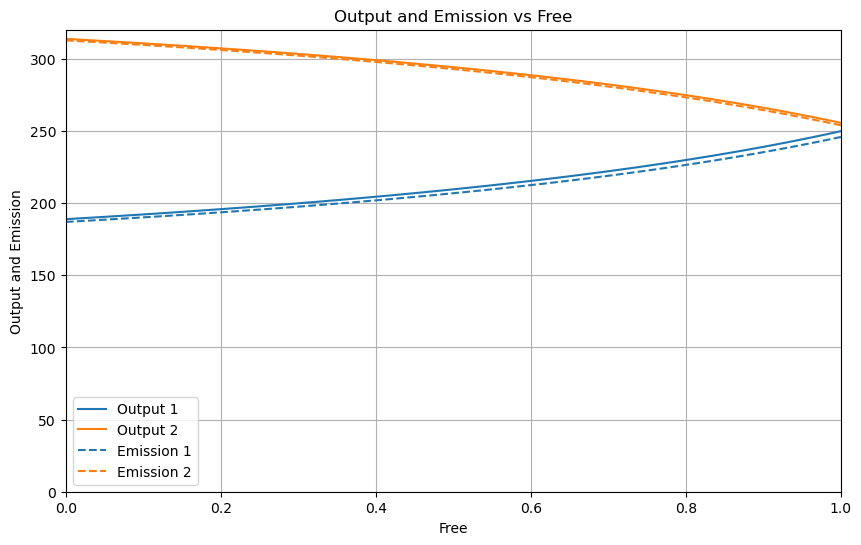

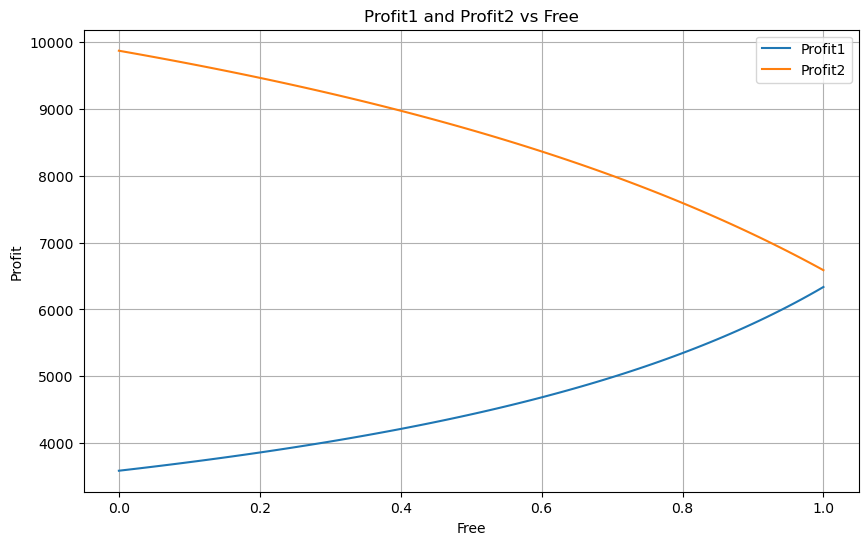

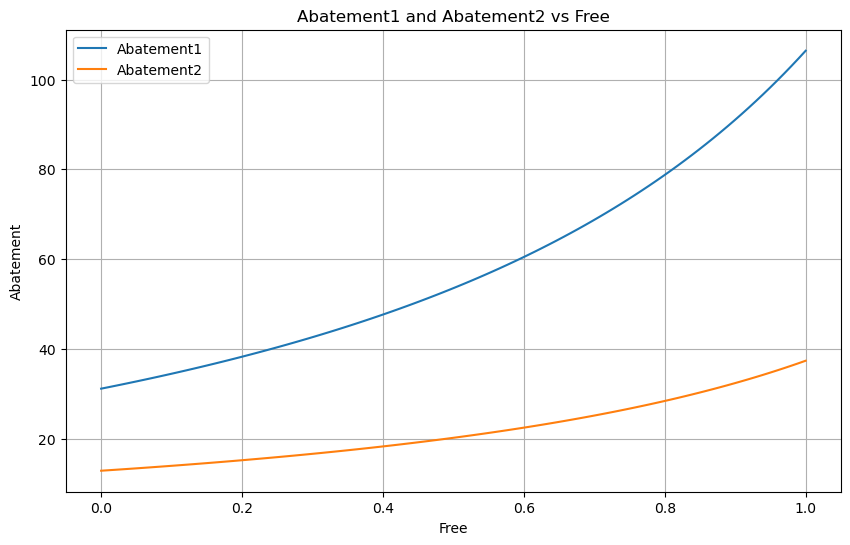

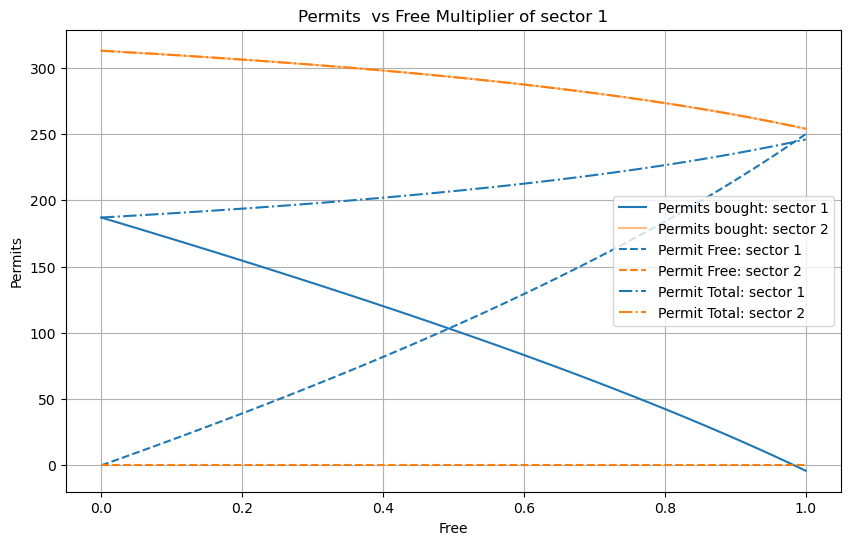

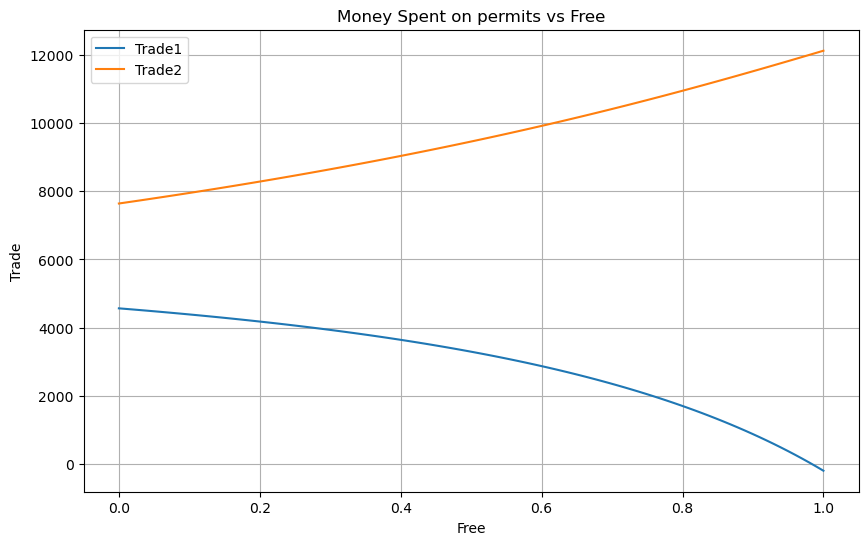

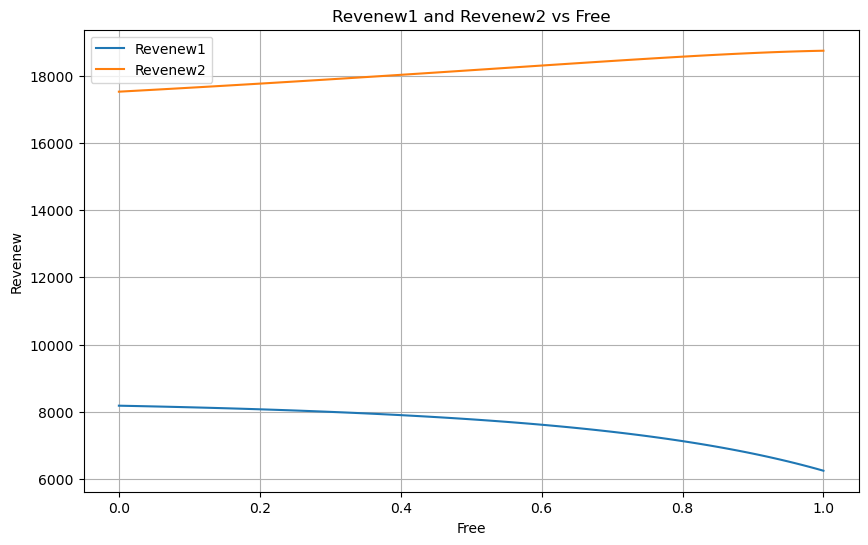

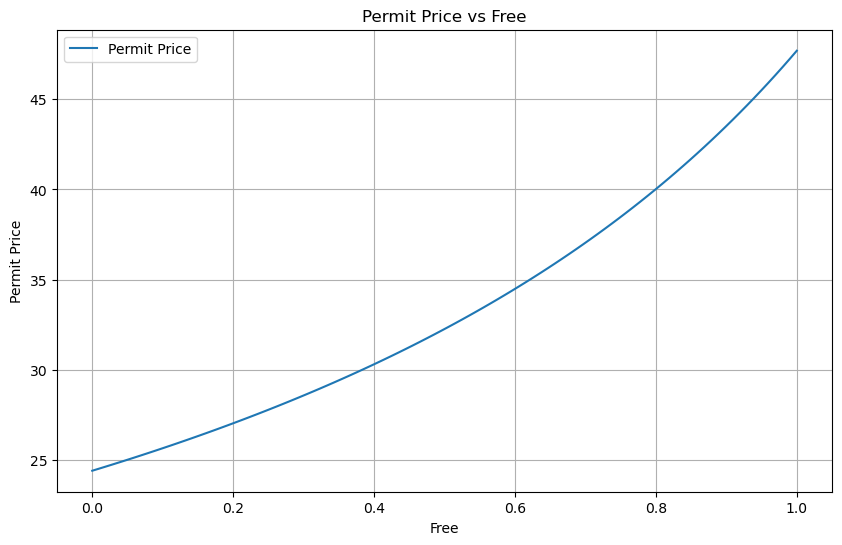

In [8]:
colors = {'b': '#1f77b4', 'o': '#ff7f0e'}

# Plot profit1 and profit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, outputs1, label='Output 1', color = '#1f77b4')
plt.plot(frees, outputs2, label='Output 2', color = '#ff7f0e')
plt.plot(frees, emissions1, label='Emission 1', linestyle='--', color = '#1f77b4')
plt.plot(frees, emissions2, label='Emission 2', linestyle='--', color = '#ff7f0e')
plt.xlabel('Free')
plt.ylabel('Output and Emission')
plt.title('Output and Emission vs Free')
plt.legend()
plt.grid()
# Set the limits for the x and y axes
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.show()

# Plot profit1 and profit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, profits1, label='Profit1')
plt.plot(frees, profits2, label='Profit2')
plt.xlabel('Free')
plt.ylabel('Profit')
plt.title('Profit1 and Profit2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot abatement1 and abatement2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, abatements1, label='Abatement1')
plt.plot(frees, abatements2, label='Abatement2')
plt.xlabel('Free')
plt.ylabel('Abatement')
plt.title('Abatement1 and Abatement2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot permit1 and permit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, permits_bought_1, label='Permits bought: sector 1', color = colors['b'])
plt.plot(frees, permits_bought_2, label='Permits bought: sector 2', color = colors['o'], alpha=0.5)
plt.plot(frees, permits_free_1, label='Permit Free: sector 1', color = colors['b'], linestyle='--')
plt.plot(frees, permits_free_2, label='Permit Free: sector 2', color = colors['o'], linestyle='--')
plt.plot(frees, permits_used_1, label='Permit Total: sector 1', color = colors['b'], linestyle='-.')
plt.plot(frees, permits_used_2, label='Permit Total: sector 2', color = colors['o'], linestyle='-.')
plt.xlabel('Free')
plt.ylabel('Permits')
plt.title('Permits  vs Free Multiplier of sector 1')
plt.legend()
plt.grid()
plt.show()

# Plot trade1 and trade2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, trades1, label='Trade1')
plt.plot(frees, trades2, label='Trade2')
plt.xlabel('Free')
plt.ylabel('Trade')
plt.title('Money Spent on permits vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot revenew1 and revenew2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, revenews1, label='Revenew1')
plt.plot(frees, revenews2, label='Revenew2')
plt.xlabel('Free')
plt.ylabel('Revenew')
plt.title('Revenew1 and Revenew2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot permit_price with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, permit_price, label='Permit Price')
plt.xlabel('Free')
plt.ylabel('Permit Price')
plt.title('Permit Price vs Free')
plt.legend()
plt.grid()
plt.show()